   Classes  gen1  gen2  gen3  gen4  gen5  gen6  gen7  gen8  gen9  ...  \
0        1     0     0     0     3     0     0     3     0     0  ...   
1        1     3     1     0     2     2     2     2     1     0  ...   
2        1     3     1     6     4     1     2     1     0     5  ...   
3        1     0     0     0     0     0     0     0     0     0  ...   
4        1     1     1     1     0     0     0     0     0     2  ...   

   gen2996  gen2997  gen2998  gen2999  gen3000  gen3001  gen3002  gen3003  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   gen3004  gen3005  
0        0        1  
1        0        1  
2        0        0  
3        0

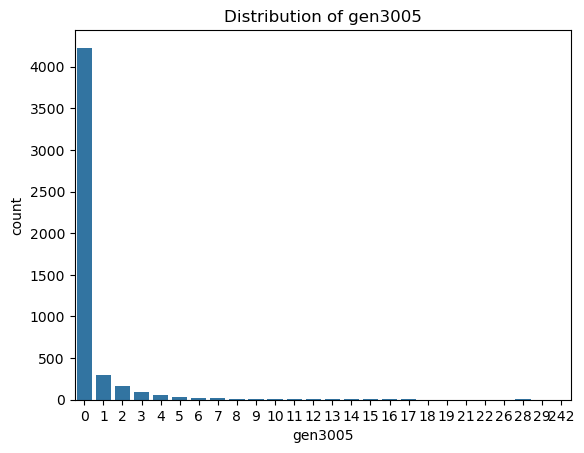

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Part (a): Exploratory Data Analysis

# Load the dataset
data = pd.read_csv('Data_Expression_mRNA_9classes.csv')

# Display the first few rows of the dataset
print(data.head())

# Check data types and missing values
print(data.info())

# Check the column names to find the correct target variable
print("Columns in the dataset:")
print(data.columns)

# Replace 'class' with the correct target column name
# Assuming that the last column is the target variable, we find the name of that column
target_column = data.columns[-1]  # Assuming the last column is the target

# Summary statistics
print(data.describe())

# Distribution of the target variable (replace 'class' with actual column name)
sns.countplot(x=target_column, data=data)
plt.title(f'Distribution of {target_column}')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Dimensionality Reduction using PCA
X = data.drop(target_column, axis=1)
y = data[target_column]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of mRNA Expression Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE of mRNA Expression Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Part (b): Model Training and Parameter Optimization

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)

# Define hyperparameters for grid search
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100]}

# Grid Search for k-NN
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

# Grid Search for Logistic Regression
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train_scaled, y_train)

# Evaluate best models
best_knn = grid_knn.best_estimator_
best_log_reg = grid_log_reg.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_log_reg = best_log_reg.predict(X_test_scaled)

# Confusion matrix and classification report for k-NN
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix for k-NN:")
print(confusion_matrix(y_test, y_pred_knn))

# Confusion matrix and classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))
